In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
test_ids = test['id']

In [3]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [4]:
train.tail()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
999995,999995,0.204312,0.344754,0.262267,0.228333,0.610727,0.357463,0.490586,0.613655,0.509203,...,0,0,0,1,0,0,1,0,0,1
999996,999996,0.182004,0.564019,0.242564,0.241178,0.453623,0.469513,0.477518,0.659226,0.519219,...,0,0,0,0,0,0,0,0,1,0
999997,999997,0.250304,0.491553,0.098547,0.235656,0.771272,0.368018,0.531642,0.598111,0.618474,...,0,0,0,0,0,0,0,0,0,0
999998,999998,0.203572,0.534923,0.180118,0.213109,0.654544,0.535152,0.316271,0.652522,0.398026,...,0,0,0,0,0,0,0,0,0,1
999999,999999,0.160972,0.596308,0.013061,0.280355,0.579849,0.401904,0.493870,0.611947,0.531370,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.isnull().sum()

id        0
f0        0
f1        0
f2        0
f3        0
         ..
f281      0
f282      0
f283      0
f284      0
target    0
Length: 287, dtype: int64

In [6]:
def _prepare(data):
    data = data.drop('id', axis=1)
    return data

train = _prepare(train)
test = _prepare(test)

In [7]:
y = train['target']
X = train.drop('target', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 400498, number of negative: 399502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.358239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61290
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 285
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500622 -> initscore=0.002490
[LightGBM] [Info] Start training from score 0.002490


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [10]:
y_pred = model.predict(X_test)

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy calculated from confusion matrix: {accuracy:.4f}")

Accuracy calculated from confusion matrix: 0.7659


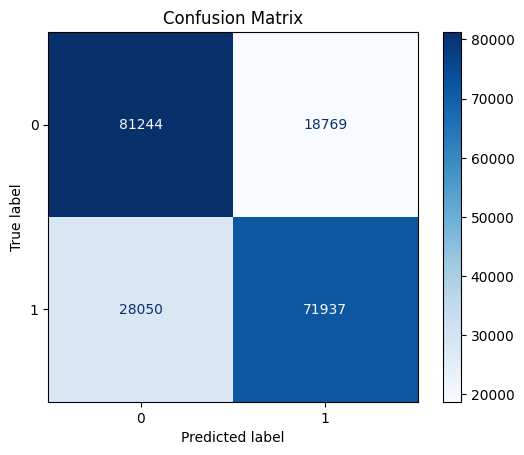

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [13]:
submisison_pred = model.predict(test)

In [16]:
df = pd.DataFrame({'id': test_ids.values,
                   'target': submisison_pred,
                  })
df.to_csv('../output/submission.csv', index=False)